In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
cases = pd.read_csv('WHO-COVID-19-global-data-2.csv')
cases = cases[['Date_reported','Country','New_cases','Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]
country_name = "Germany"
country_filter = cases['Country'] == country_name
cases = cases[country_filter]

In [3]:
date = cases['Date_reported'].values
deats_by_day = cases['New_deaths'].values
cases_by_day = cases['New_cases'].values

In [4]:
number_of_items = len(date)
days = np.arange(1, number_of_items+1)

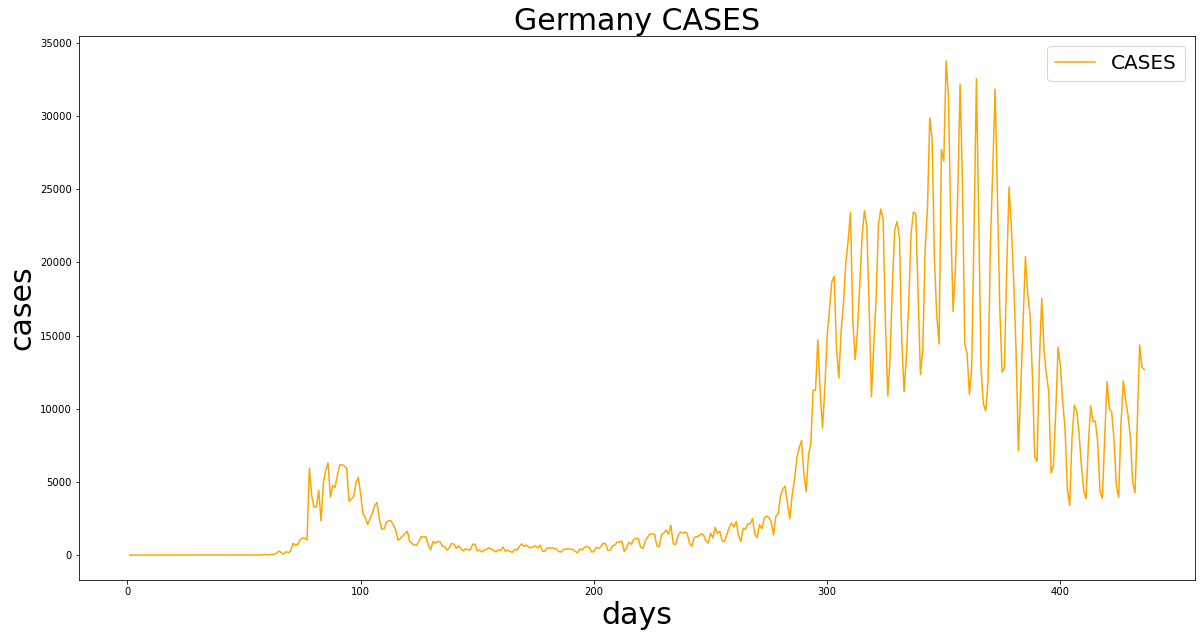

In [5]:
plt.plot(days, cases_by_day, label="CASES", color="orange")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [6]:
def mape(true, pred):
    return np.mean(np.abs((true-pred)/true))*100
def mse(true, predictions):
    return np.mean((true-predictions)**2)
def rmse(true, predictions):
    return np.mean((true-predictions)**2)**0.5

# Moving Average

In [7]:
cases_starting_from_54 = cases_by_day[54:]

# MA3

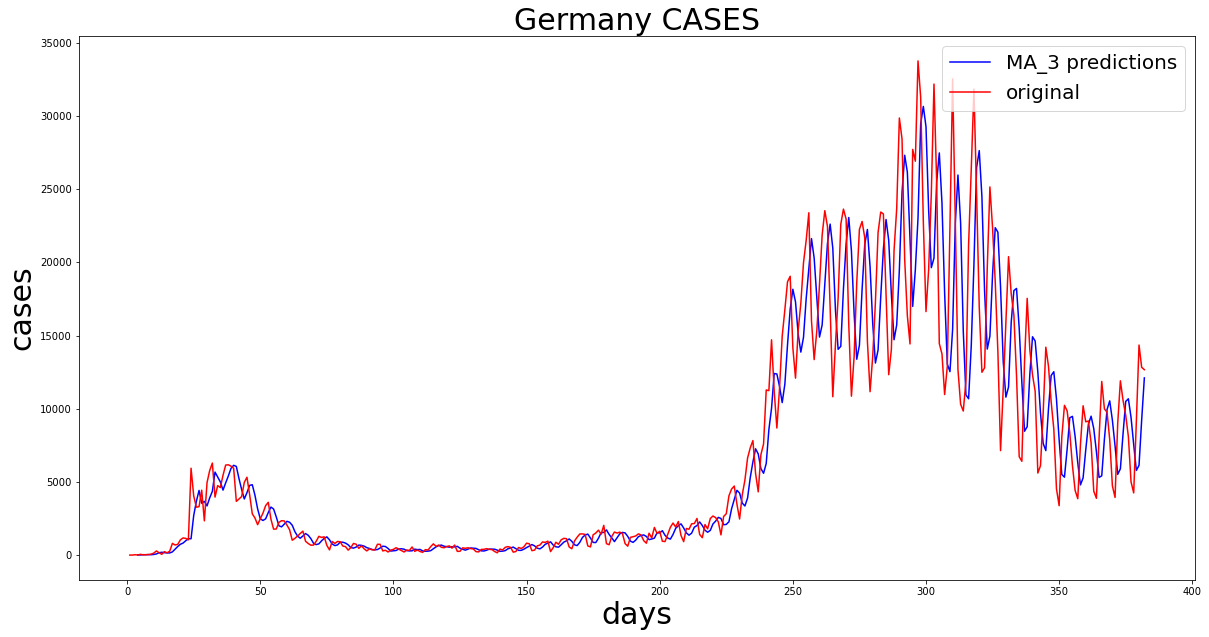

In [8]:
ma_3=[]
for i in range(len(cases_starting_from_54)-3):
    ma_3.append((cases_starting_from_54[i] + cases_starting_from_54[i+1] + cases_starting_from_54[i+2])/3.0)

plt.plot(np.arange(4,len(ma_3)+4), ma_3, label="MA_3 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [9]:
mape(cases_starting_from_54[3:], ma_3)

39.71815469859201

In [10]:
mse(cases_starting_from_54[3:], ma_3)

14991195.867487537

In [11]:
rmse(cases_starting_from_54[3:], ma_3)

3871.8465707576192

# MA2

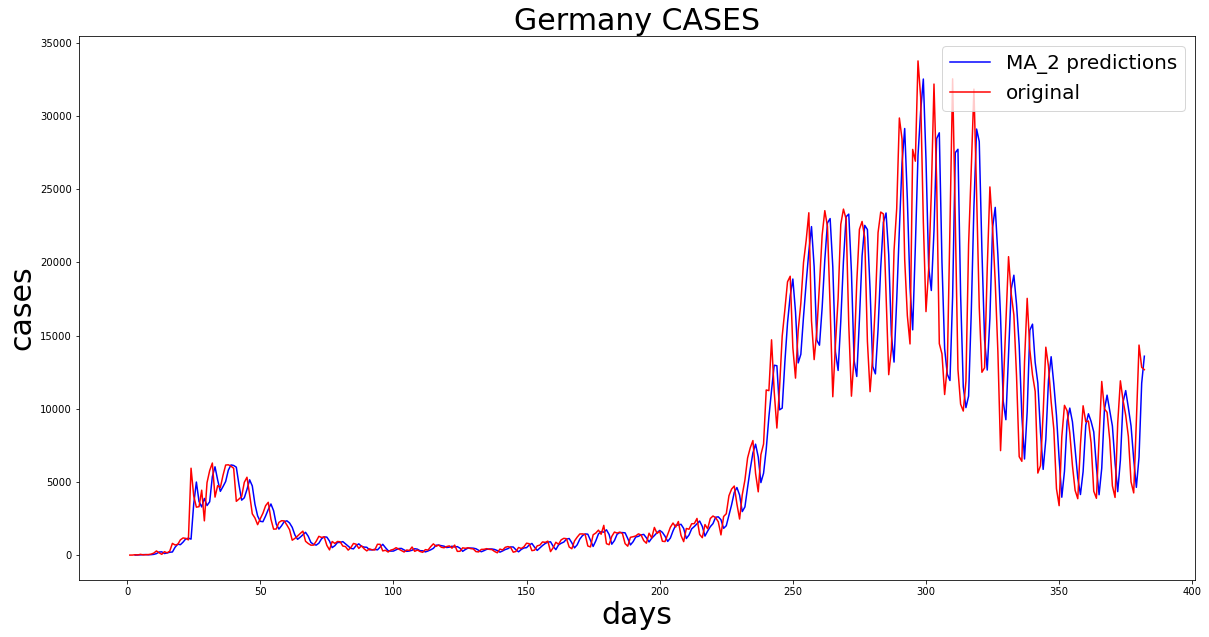

In [12]:
ma_2=[]
for i in range(len(cases_starting_from_54)-2):
    ma_2.append((cases_starting_from_54[i] + cases_starting_from_54[i+1])/2.0)

plt.plot(np.arange(3,len(ma_2)+3), ma_2, label="MA_2 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [13]:
mape(cases_starting_from_54[2:], ma_2)

36.51679917542839

In [14]:
mse(cases_starting_from_54[2:], ma_2)

11944379.414473685

In [15]:
rmse(cases_starting_from_54[2:], ma_2)

3456.064150804161

# MA1

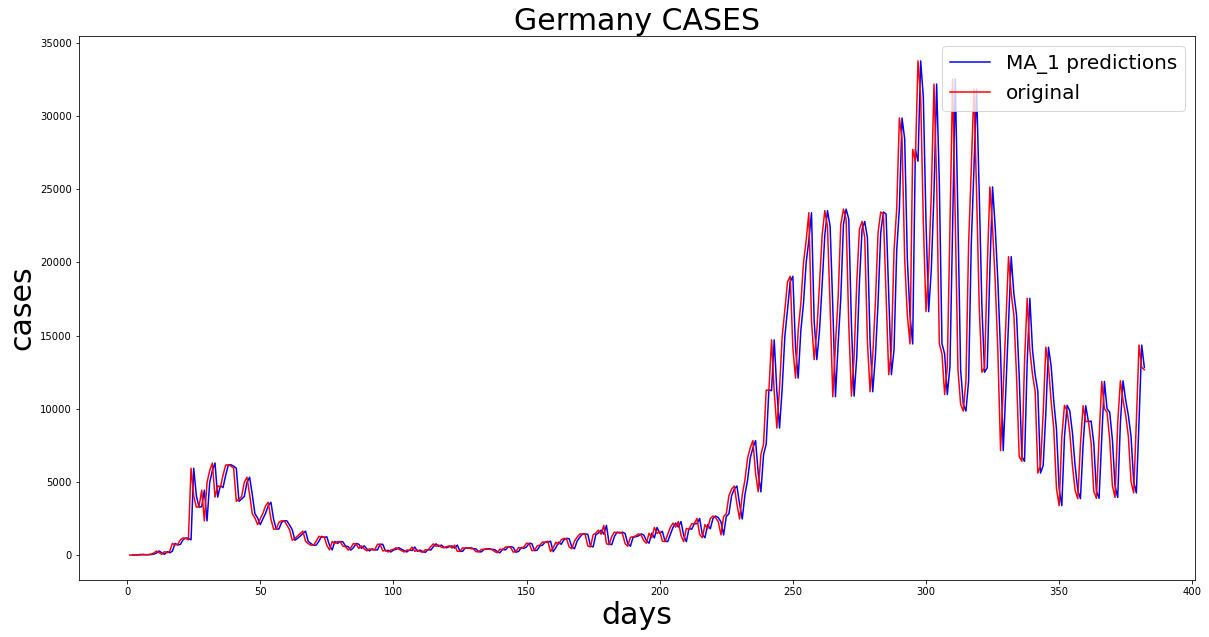

In [16]:
ma_1=[]
for i in range(len(cases_starting_from_54)-1):
    ma_1.append(cases_starting_from_54[i])
plt.plot(np.arange(2,len(ma_1)+2), ma_1, label="MA_1 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [17]:
mape(cases_starting_from_54[1:], ma_1)

31.118701557810365

In [18]:
mse(cases_starting_from_54[1:], ma_1)

7574874.745406824

In [19]:
rmse(cases_starting_from_54[1:], ma_1)

2752.2490340459426

# MA7

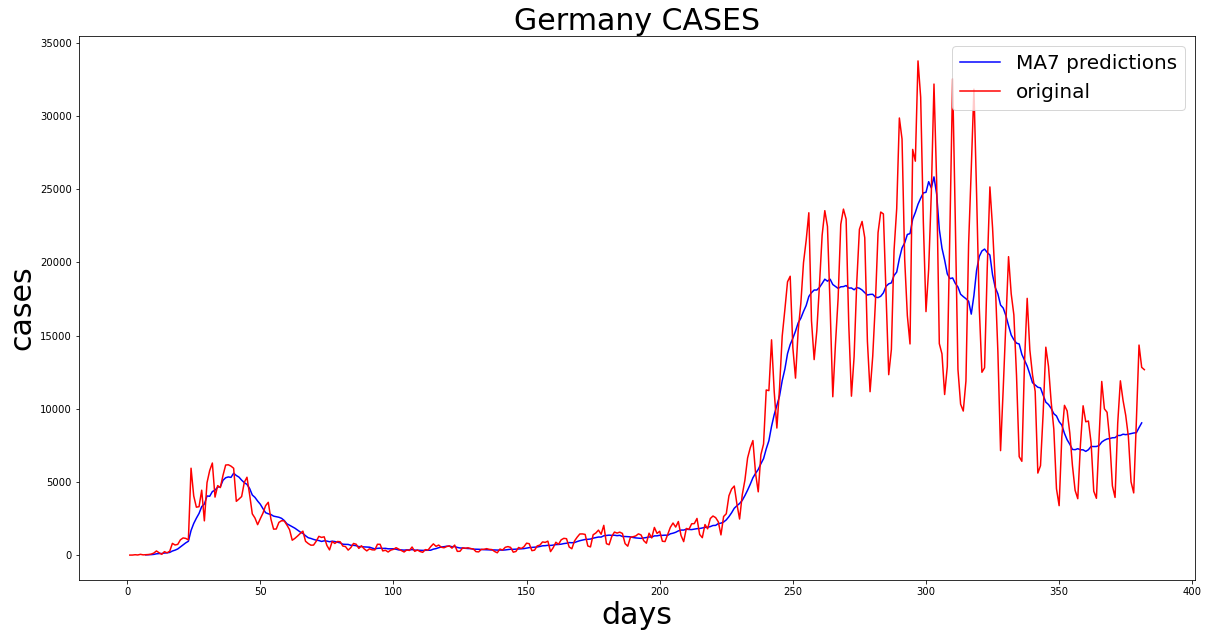

In [20]:
ma7 = []
for i in range(len(cases_starting_from_54)-7):
    ma7.append((cases_starting_from_54[i] + 
                cases_starting_from_54[i+1] + 
                cases_starting_from_54[i+2] + 
                cases_starting_from_54[i+3] + 
                cases_starting_from_54[i+4] + 
                cases_starting_from_54[i+5] + 
                cases_starting_from_54[i+6])/7.0)
    
plt.plot(np.arange(7,len(ma7)+7), ma7, label="MA7 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [21]:
mape(cases_starting_from_54[7:], ma7)

33.78979955347745

In [22]:
mse(cases_starting_from_54[7:], ma7)

9733491.132571427

In [23]:
rmse(cases_starting_from_54[7:], ma7)

3119.8543447685865

# MA1_LAG7

In [24]:
lag_7 = cases_starting_from_54[7:]- cases_starting_from_54[:len(cases_starting_from_54)-7]

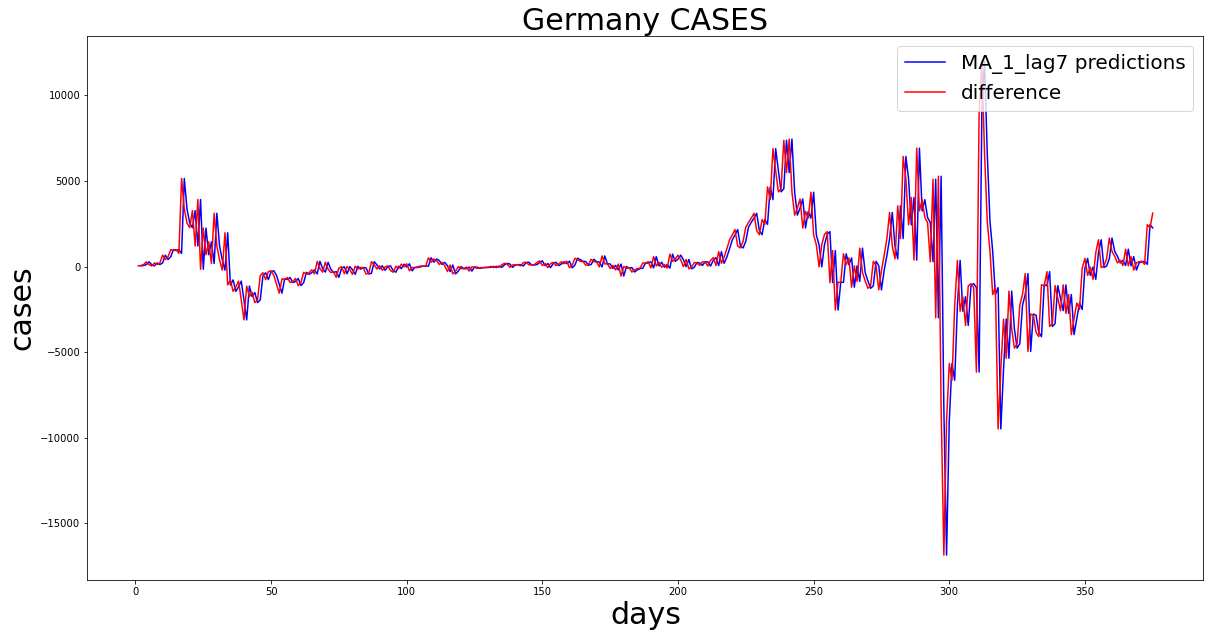

In [25]:
ma1_lag7 = []
for i in range(len(lag_7)-1):
    ma1_lag7.append(lag_7[i])
plt.plot(np.arange(2,len(ma1_lag7)+2), ma1_lag7, label="MA_1_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(lag_7)+1), lag_7, label="difference", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

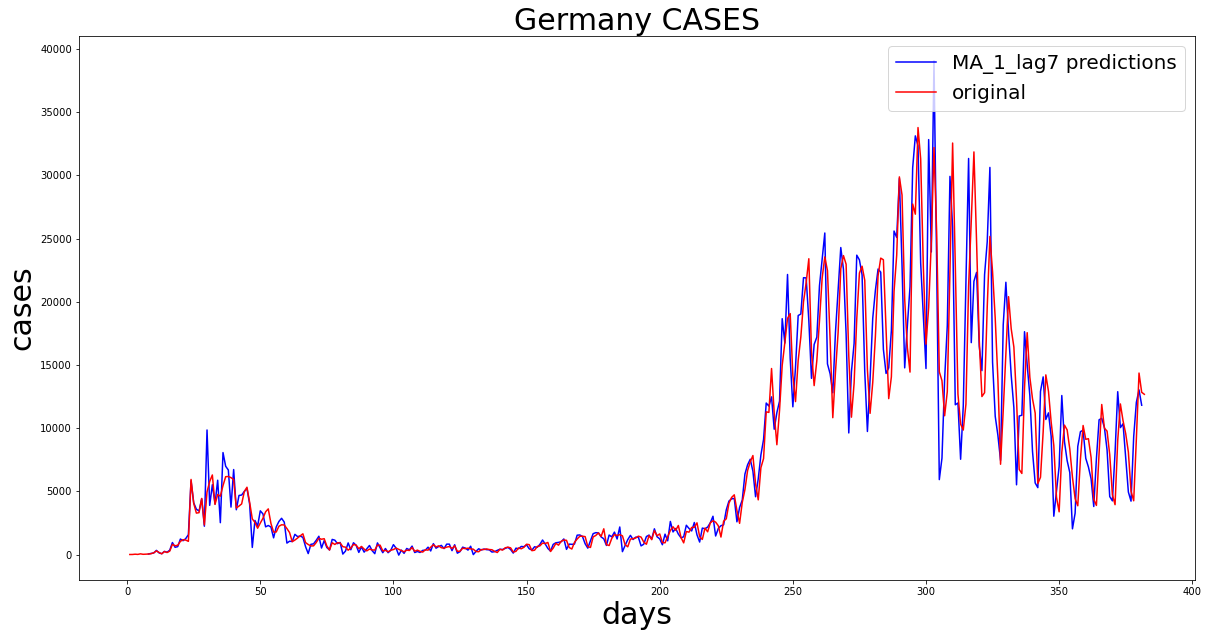

In [26]:
ma1_lag7_org = ma1_lag7 + cases_starting_from_54[1:len(cases_starting_from_54)-7]
plt.plot(np.arange(8,len(ma1_lag7_org)+8), ma1_lag7_org, label="MA_1_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [27]:
mape(cases_starting_from_54[8:], ma1_lag7_org)

24.493535760208584

In [28]:
mse(cases_starting_from_54[8:], ma1_lag7_org)

3800592.5187165774

In [29]:
rmse(cases_starting_from_54[8:], ma1_lag7_org)

1949.5108408820345

# MA3_LAG7

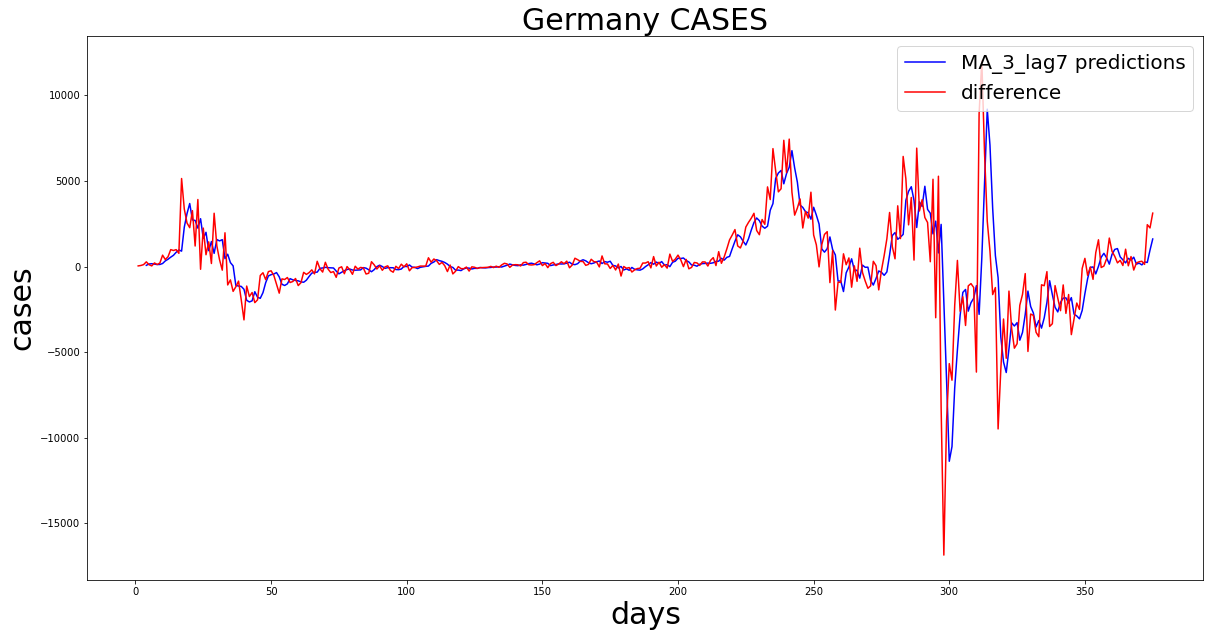

In [30]:
ma3_lag7 = []
for i in range(len(lag_7)-3):
    ma3_lag7.append((lag_7[i] + lag_7[i+1] + lag_7[i+2])/3.0)
plt.plot(np.arange(4,len(ma3_lag7)+4), ma3_lag7, label="MA_3_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(lag_7)+1), lag_7, label="difference", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

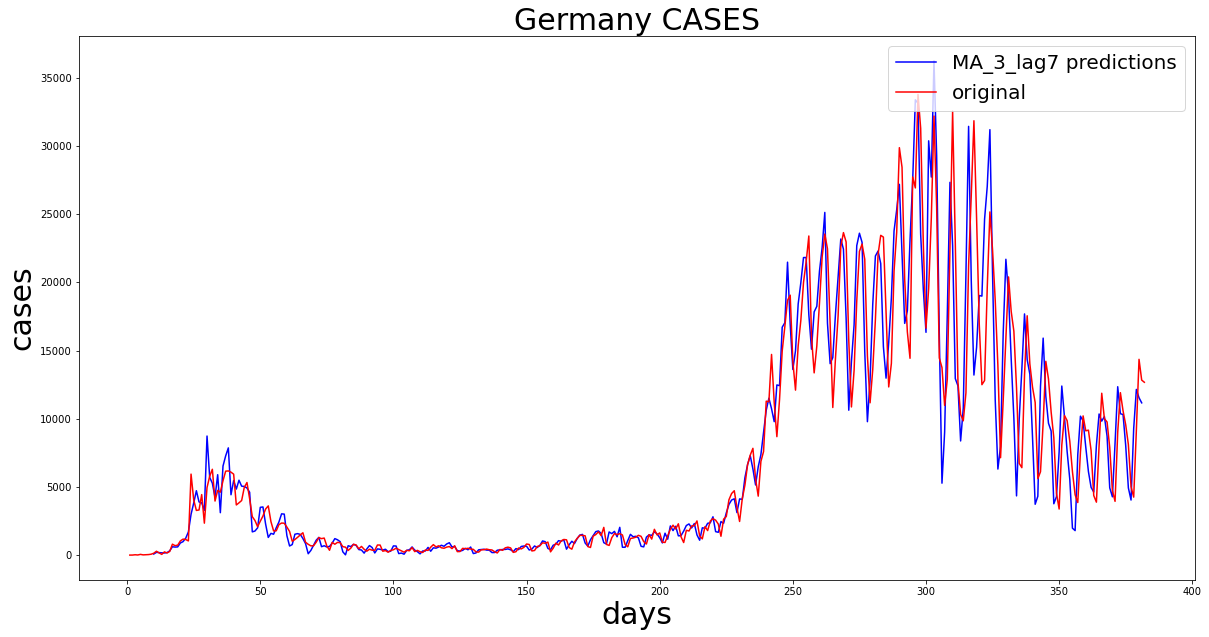

In [31]:
ma3_lag7_org = ma3_lag7 + cases_starting_from_54[3:len(cases_starting_from_54)-7]
plt.plot(np.arange(10,len(ma3_lag7_org)+10), ma3_lag7_org, label="MA_3_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [32]:
mape(cases_starting_from_54[10:], ma3_lag7_org)

21.385622498095056

In [33]:
mse(cases_starting_from_54[10:], ma3_lag7_org)

3717036.3070489834

In [34]:
rmse(cases_starting_from_54[10:], ma3_lag7_org)

1927.9616975056801

# MA7_WEIGHTED

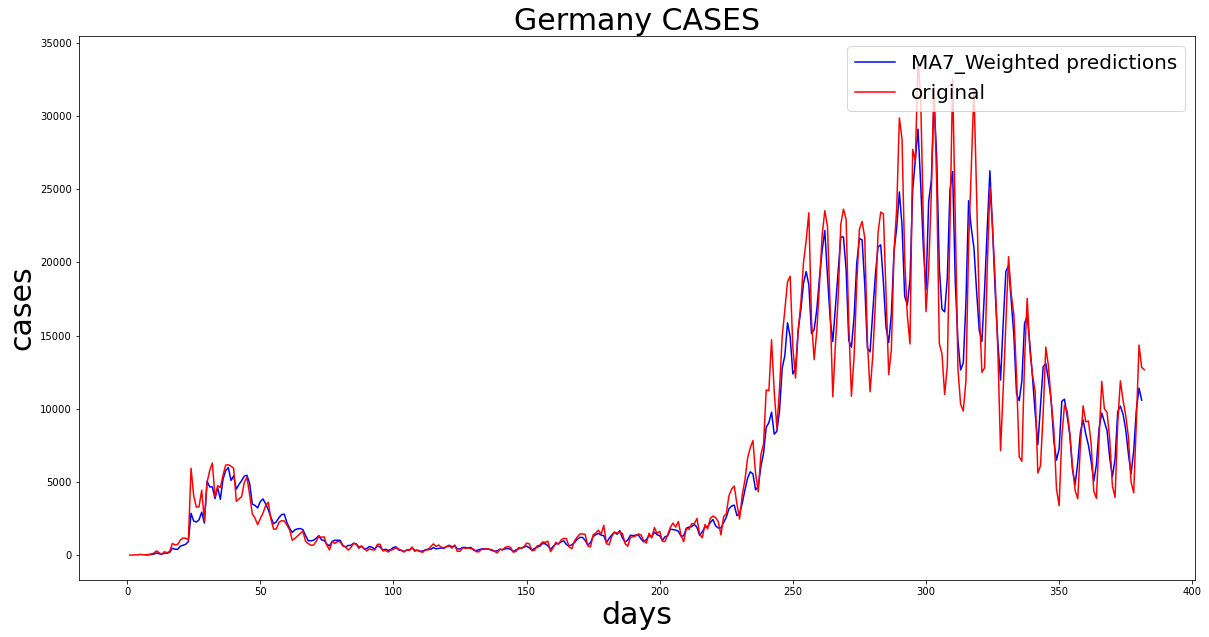

In [35]:
ma7_weighted = []
for i in range(len(cases_starting_from_54)-7):
    ma7_weighted.append(0.4 * cases_starting_from_54[i] + 
                        0.04 * cases_starting_from_54[i+1] + 
                        0.04 * cases_starting_from_54[i+2] + 
                        0.04 * cases_starting_from_54[i+3] + 
                        0.04 * cases_starting_from_54[i+4] + 
                        0.04 * cases_starting_from_54[i+5] + 
                        0.4 *cases_starting_from_54[i+6])
plt.plot(np.arange(7,len(ma7_weighted)+7), ma7_weighted, label="MA7_Weighted predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [36]:
mape(cases_starting_from_54[7:], ma7_weighted)

25.373541382119836

In [37]:
mse(cases_starting_from_54[7:], ma7_weighted)

4428578.540684799

In [38]:
rmse(cases_starting_from_54[7:], ma7_weighted)

2104.4188130419284

# MA7_LAG7

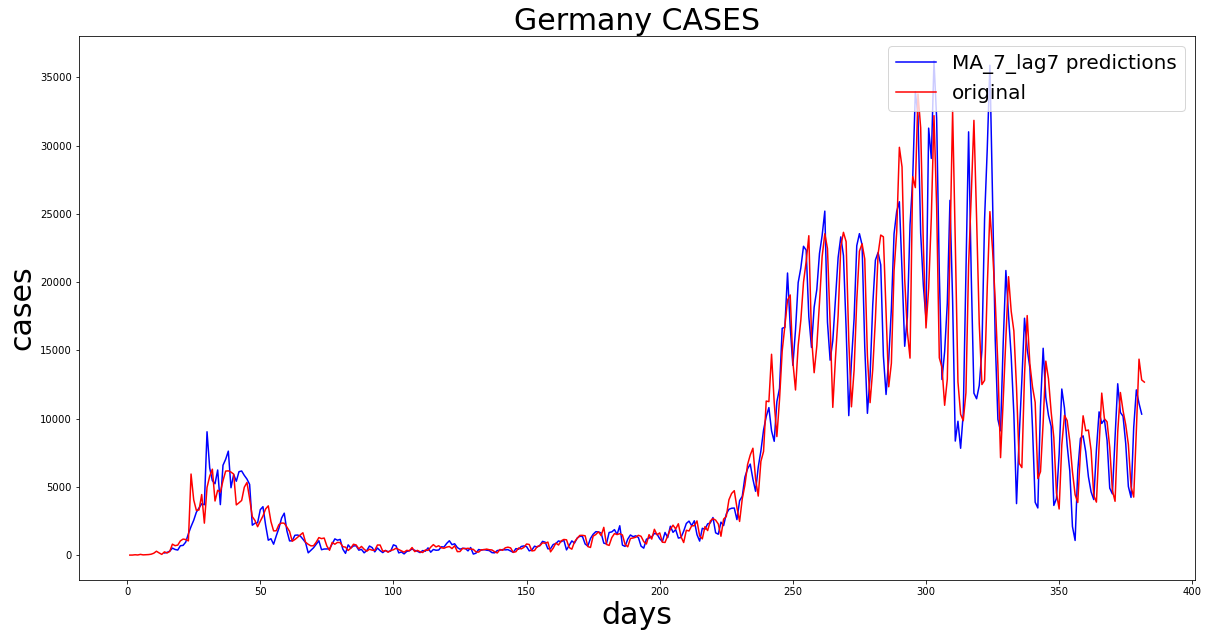

In [39]:
ma7_lag7 = []
for i in range(len(lag_7)-7):
    ma7_lag7.append((lag_7[i] + 
                     lag_7[i+1] + 
                     lag_7[i+2] + 
                     lag_7[i+3] + 
                     lag_7[i+4] + 
                     lag_7[i+5] + 
                     lag_7[i+6])/7.0)

ma7_lag7_org = ma7_lag7 + cases_starting_from_54[7:len(cases_starting_from_54)-7]

plt.plot(np.arange(14,len(ma7_lag7_org)+14), ma7_lag7_org, label="MA_7_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [40]:
mape(cases_starting_from_54[14:], ma7_lag7_org)

21.030497485696458

In [41]:
mse(cases_starting_from_54[14:], ma7_lag7_org)

4551671.954636202

In [42]:
rmse(cases_starting_from_54[14:], ma7_lag7_org)

2133.464776985128

# MA7_LAG7_WEIGHTED

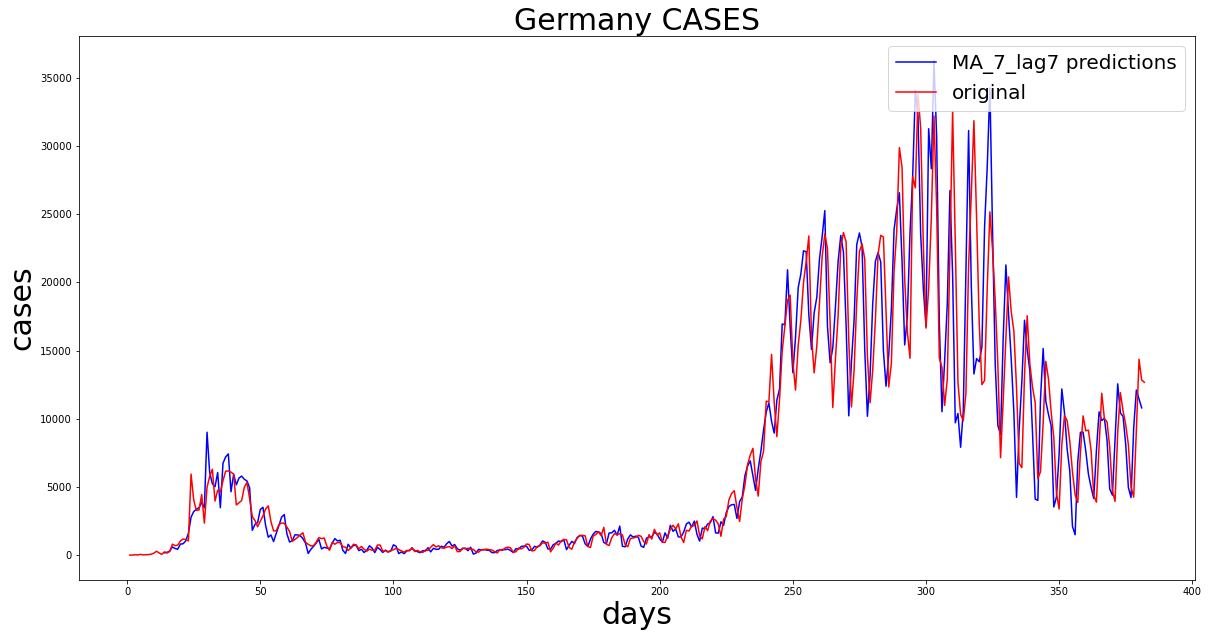

In [43]:
ma7_lag7_weighted = []
for i in range(len(lag_7)-7):
    ma7_lag7_weighted.append(0.1 * lag_7[i] + 
                             0.1 * lag_7[i+1] + 
                             0.1 * lag_7[i+2] + 
                             0.1 * lag_7[i+3] + 
                             0.1 * lag_7[i+4] + 
                             0.2 * lag_7[i+5] + 
                             0.30 * lag_7[i+6])
ma7_lag7_weighted_org = ma7_lag7_weighted + cases_starting_from_54[7:len(cases_starting_from_54)-7]

plt.plot(np.arange(14,len(ma7_lag7_weighted_org)+14), ma7_lag7_weighted_org, label="MA_7_lag7 predictions", color="blue")
plt.plot(np.arange(1,len(cases_starting_from_54)+1), cases_starting_from_54, label="original", color="red")
plt.title(country_name + " CASES", fontsize = 30)
plt.xlabel("days", fontsize = 30)
plt.ylabel("cases", fontsize = 30)
plt.legend(loc=1, prop={'size':20})

In [44]:
mape(cases_starting_from_54[14:], ma7_lag7_weighted_org)

19.923766643166225

In [45]:
mse(cases_starting_from_54[14:], ma7_lag7_weighted_org)

3791657.2208423913

In [46]:
rmse(cases_starting_from_54[14:], ma7_lag7_weighted_org)

1947.2178154593778